In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_excel(r"c:\Users\vishwas.balkundi\Downloads\crop yield data sheet.xlsx")

In [39]:
df

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.dropna(inplace=True)

In [41]:
# df.isnull().sum()

Rain Fall (mm)    10
Fertilizer        10
Temperatue         9
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64

In [43]:
df['Yeild (Q/acre)'].min()

5.5

In [44]:
df.columns

Index(['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)',
       'Phosphorus (P)', 'Potassium (K)', 'Yeild (Q/acre)'],
      dtype='object')

<Axes: xlabel='Potassium (K)', ylabel='Count'>

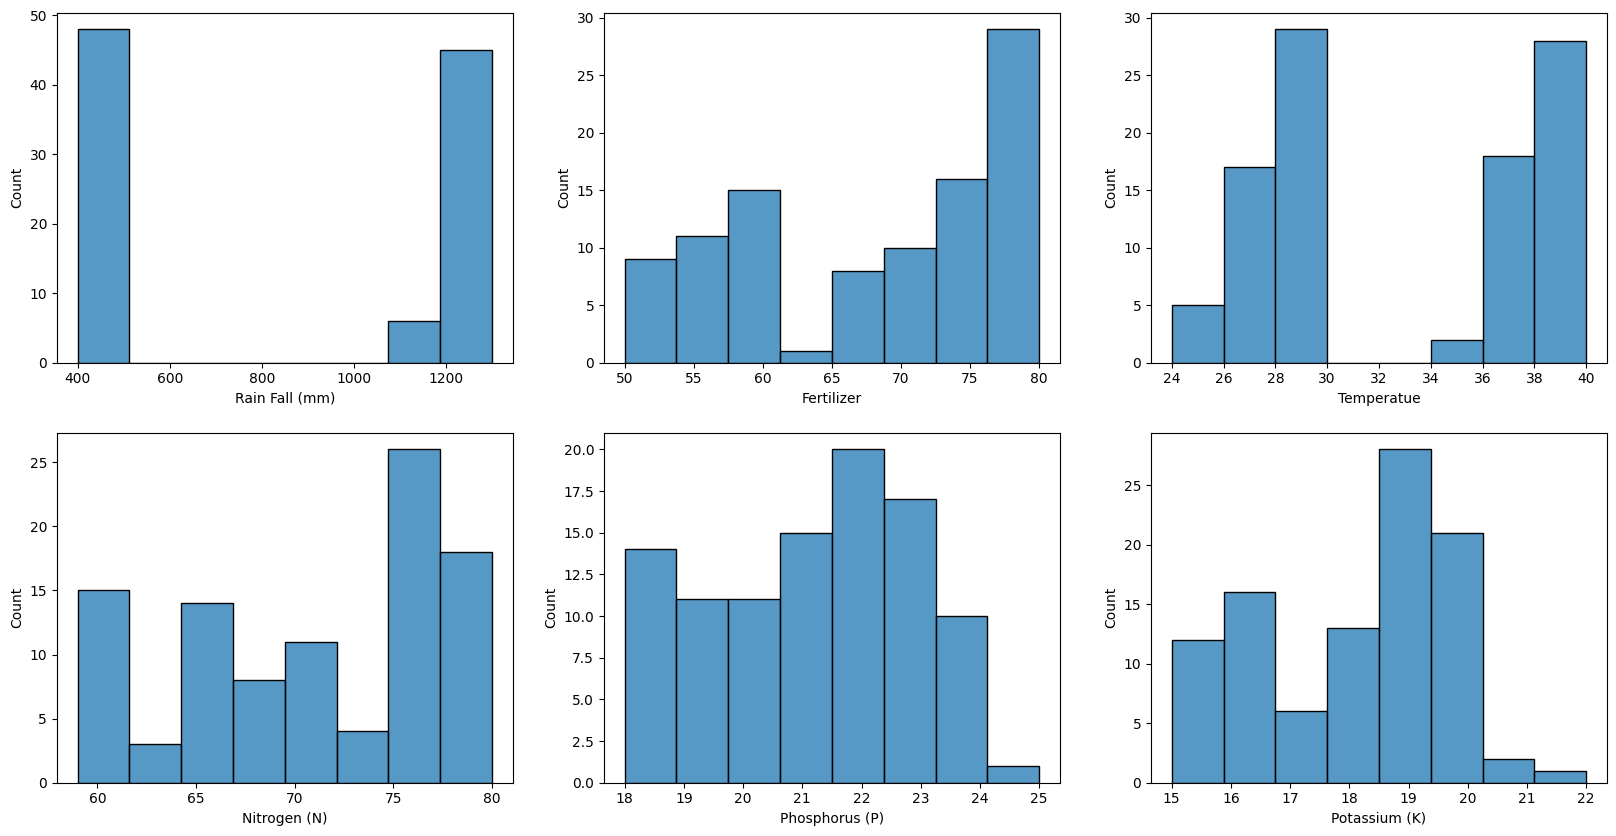

In [48]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.histplot (df['Rain Fall (mm)'], ax=ax[0,0])
sns.histplot(df['Fertilizer'], ax=ax[0,1])
sns.histplot(df['Temperatue'], ax=ax[0,2])
sns.histplot(df['Nitrogen (N)'], ax=ax[1,0])
sns.histplot(df['Phosphorus (P)'], ax=ax[1,1])
sns.histplot(df['Potassium (K)'], ax=ax[1,2])
# sns.histplot(df['Yeild (Q/acre))'], ax=ax[1,1], bins = 100)

In [46]:
df['Temperatue'] = df['Temperatue'].astype(float)

In [47]:
df.dtypes

Rain Fall (mm)    float64
Fertilizer        float64
Temperatue        float64
Nitrogen (N)      float64
Phosphorus (P)    float64
Potassium (K)     float64
Yeild (Q/acre)    float64
dtype: object

<Axes: >

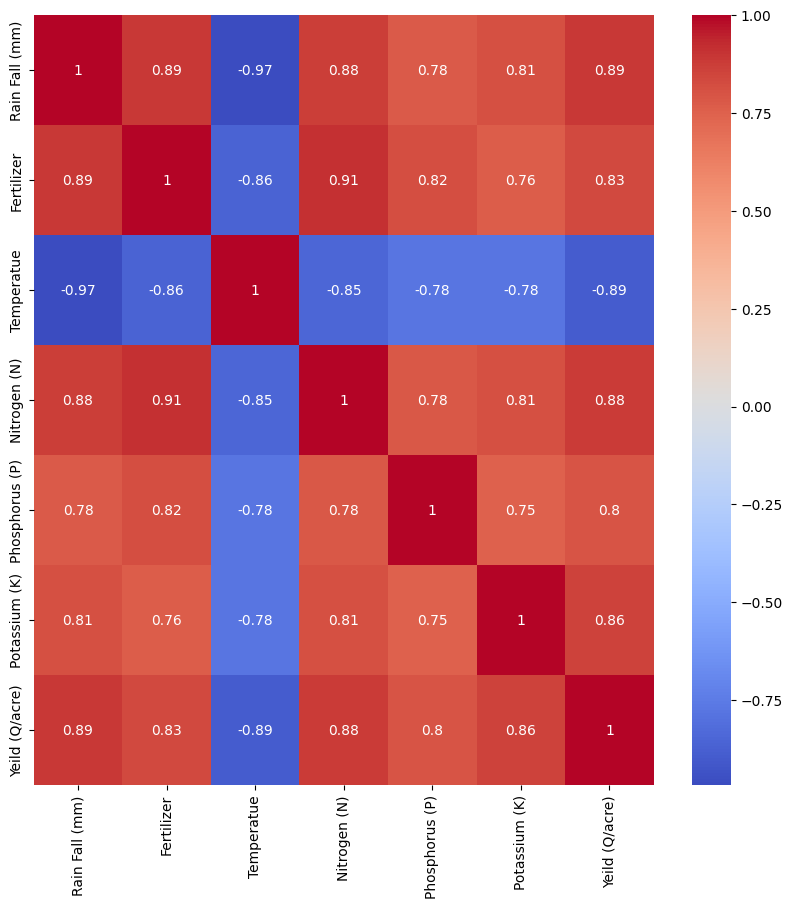

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Yeild (Q/acre)', axis = 1), df['Yeild (Q/acre)'], test_size = 0.2, random_state = 42)

In [50]:
from sklearn.tree import DecisionTreeRegressor

#Decision Tree Regressor object
dtr = DecisionTreeRegressor()

In [51]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(dtr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 42}


In [52]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 8, random_state = 0)

#fitting the model
dtr.fit(X_train, y_train)

#training score
print(dtr.score(X_train, y_train))

#prediction
d_pred = dtr.predict(X_test)

0.921123113697911


In [53]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regressor object
rfr = RandomForestRegressor()

In [11]:
# pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Note: you may need to restart the kernel to use updated packages.
